# ModVege grass growth model (Jouven et al. 2006)

- Jouven, M., Carrère, P., and Baumont, R. (2006a). 'Model predicting
  dynamics of biomass, structure and digestibility of herbage in managed
  permanent pastures. 1. Model description', *Grass and Forage Science*,
  vol. 61, no. 2, pp. 112-124. DOI:
  [10.1111/j.1365-2494.2006.00515.x][Jouven1].
- Jouven, M., Carrère, P., and Baumont, R. (2006b). 'Model predicting
  dynamics of biomass, structure and digestibility of herbage in managed
  permanent pastures. 2. Model evaluation', *Grass and Forage Science*,
  vol. 61, no. 2, pp. 125-133. DOI:
  [10.1111/j.1365-2494.2006.00517.x][Jouven2].
- Chemin, Y. (2022). 'modvege', Python. [Online]. Available at
  <https://github.com/YannChemin/modvege> (Accessed 6 September 2022).

[Jouven1]: https://doi.org/10.1111/j.1365-2494.2006.00515.x
[Jouven2]: https://doi.org/10.1111/j.1365-2494.2006.00517.x

In [1]:
import os
from datetime import datetime, timezone
import numpy as np
import pandas as pd
from climag.modvege_run import run_modvege

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2023-03-01 13:06:13.258754+00:00


In [3]:
DATA_DIR = os.path.join("data", "ModVege")

# define the name of the input params file
PARAMS_FILE = os.path.join(DATA_DIR, "params.csv")

In [4]:
# define the name of the input time series file
TS_FILE = os.path.join("data", "met", "MetEireann", "valentia.csv")

## Input time series

In [5]:
ts = pd.read_csv(TS_FILE, parse_dates=["time"])

In [6]:
ts.sort_values(by=["time"], inplace=True)
ts = ts.reset_index().set_index("time")

In [7]:
ts.head()

,index,T,PAR,PET,PP,RG
time,,,,,,
2019-01-01,0,9.85,1.28656,0.3,0.0,2.72
2019-01-02,1,9.35,1.41427,0.5,0.1,2.99
2019-01-03,2,8.95,0.80883,0.8,0.9,1.71
2019-01-04,3,8.35,0.97911,1.0,0.0,2.07
2019-01-05,4,9.55,0.57706,0.9,0.0,1.22


In [8]:
ts.tail()

,index,T,PAR,PET,PP,RG
time,,,,,,
2021-12-27,1091,9.60,1.71699,0.3,0.9,3.63
2021-12-28,1092,9.65,0.70004,0.6,7.7,1.48
2021-12-29,1093,12.60,1.19669,0.5,9.9,2.53
2021-12-30,1094,12.70,0.30272,0.3,22.2,0.64
2021-12-31,1095,13.20,0.44462,0.7,2.0,0.94


In [9]:
for year in ts.index.year.unique():
    print("T", year, round(np.mean(ts.loc[str(year)]["T"]), 2))
    print("PP", year, round(np.mean(ts.loc[str(year)]["PP"]), 2))
    print(
        "grazing season length",
        round(
            29.3 * np.mean(ts.loc[str(year)]["T"])
            - 0.1 * np.sum(ts.loc[str(year)]["PP"])
            + 19.5
        ),
    )

T 2019 11.13
PP 2019 4.66
grazing season length 175
T 2020 11.0
PP 2020 5.3
grazing season length 148
T 2021 11.15
PP 2021 4.24
grazing season length 191


## Results for different residual grass heights

### h = 0.05 m

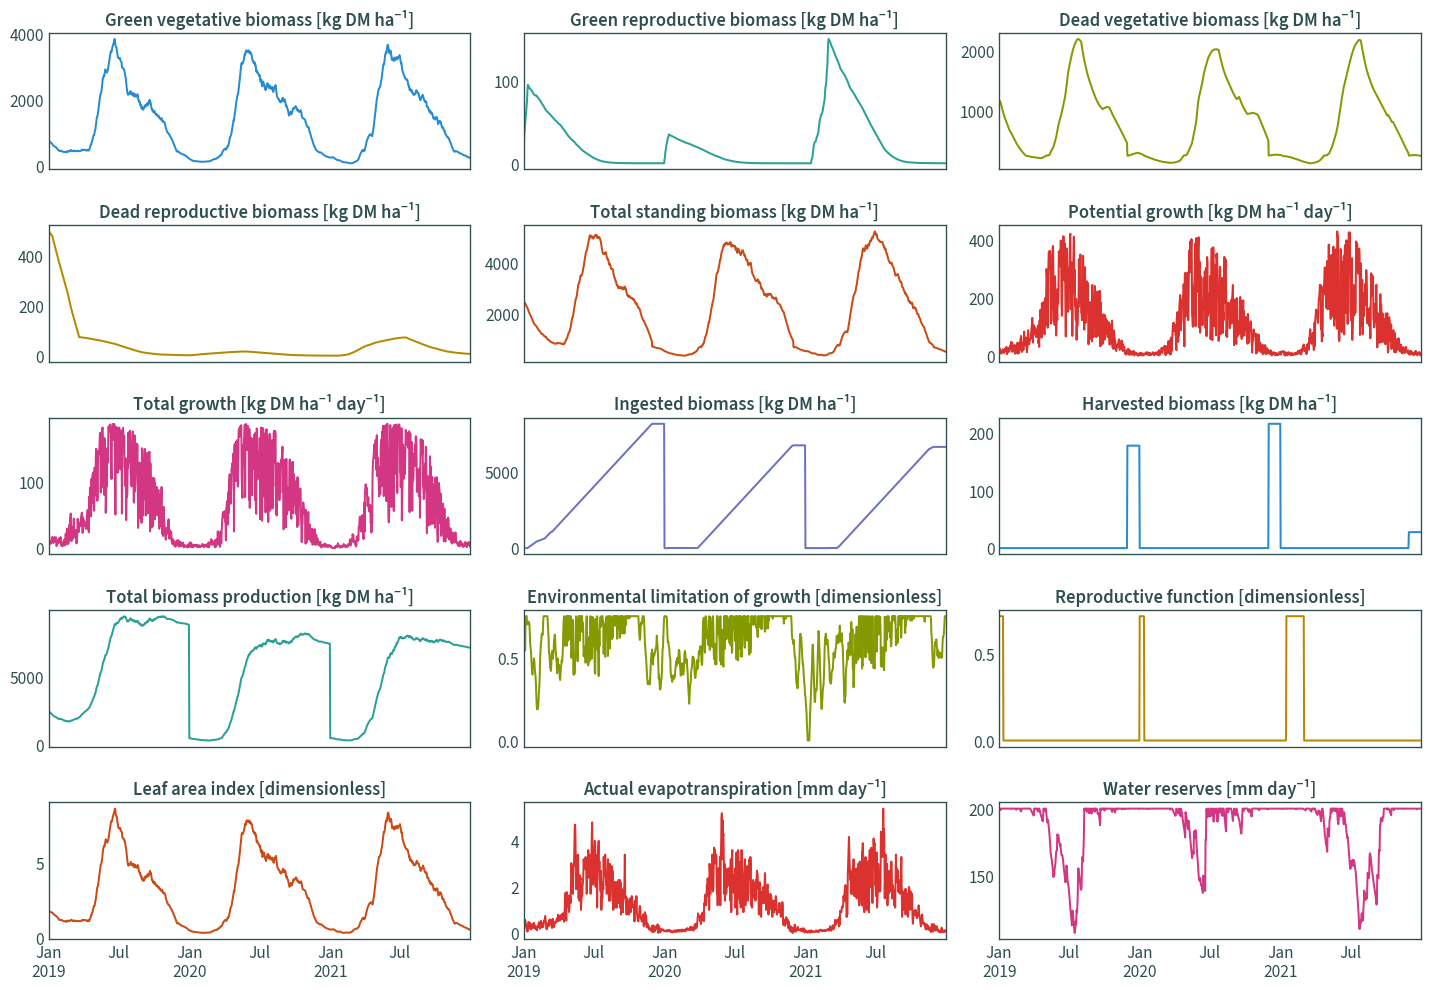

In [10]:
# run the main function using the example data
# rep = 0 when grazed/harvested
run_modvege(
    input_params_file=PARAMS_FILE,
    input_timeseries_file=TS_FILE,
    out_dir=DATA_DIR,
)

### h = 0.00 m (max cutting)

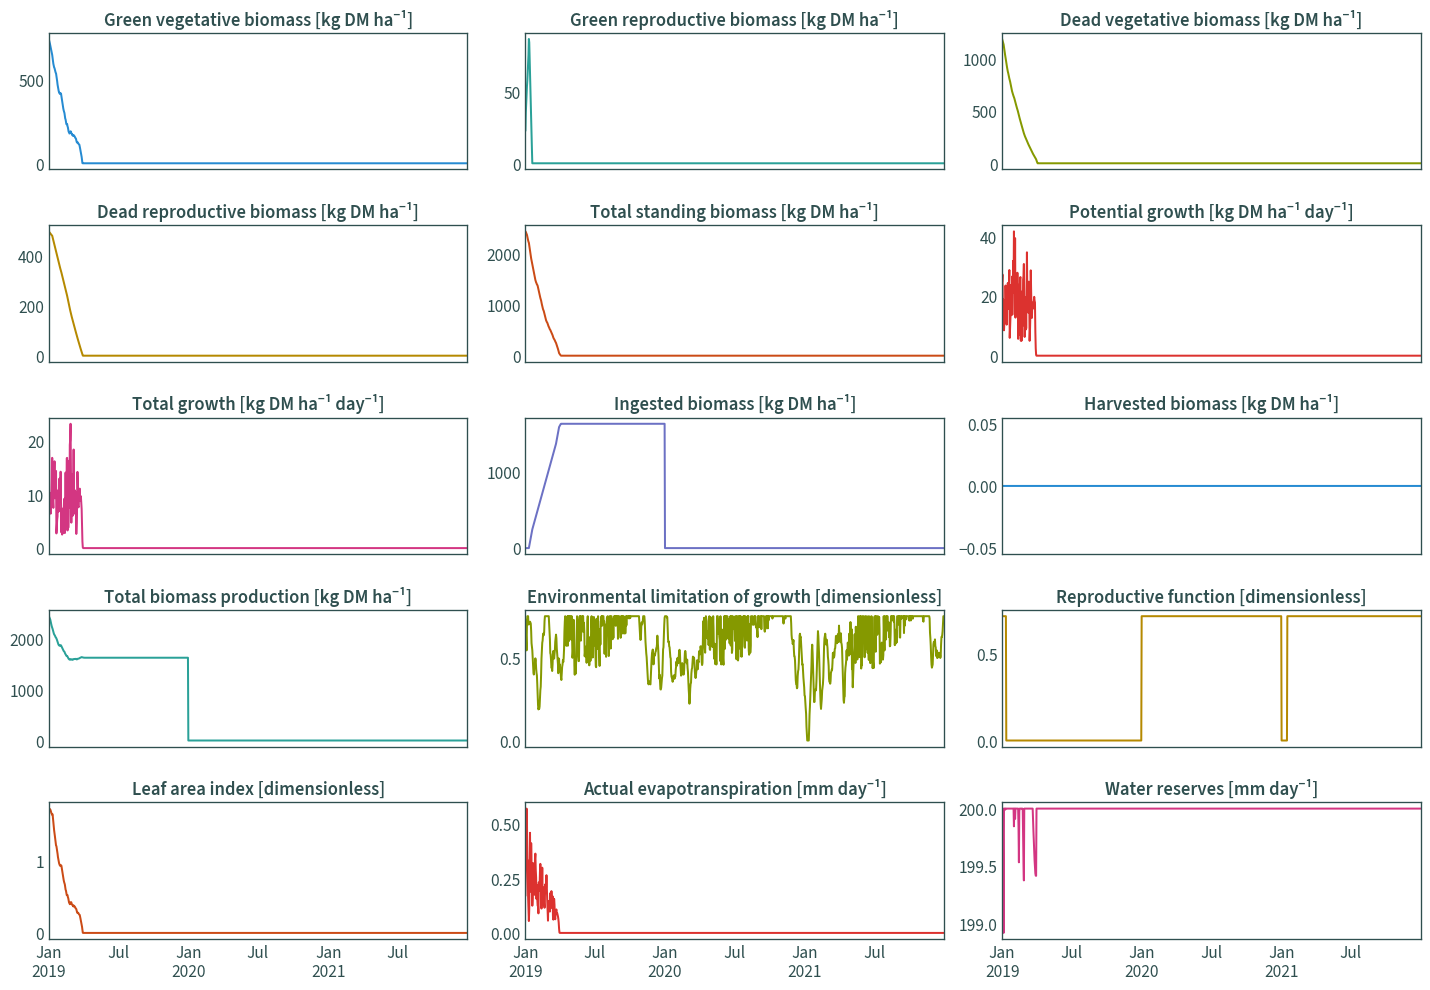

In [11]:
run_modvege(
    input_params_file=PARAMS_FILE,
    input_timeseries_file=TS_FILE,
    out_dir=DATA_DIR,
)

### h = None (no cutting)

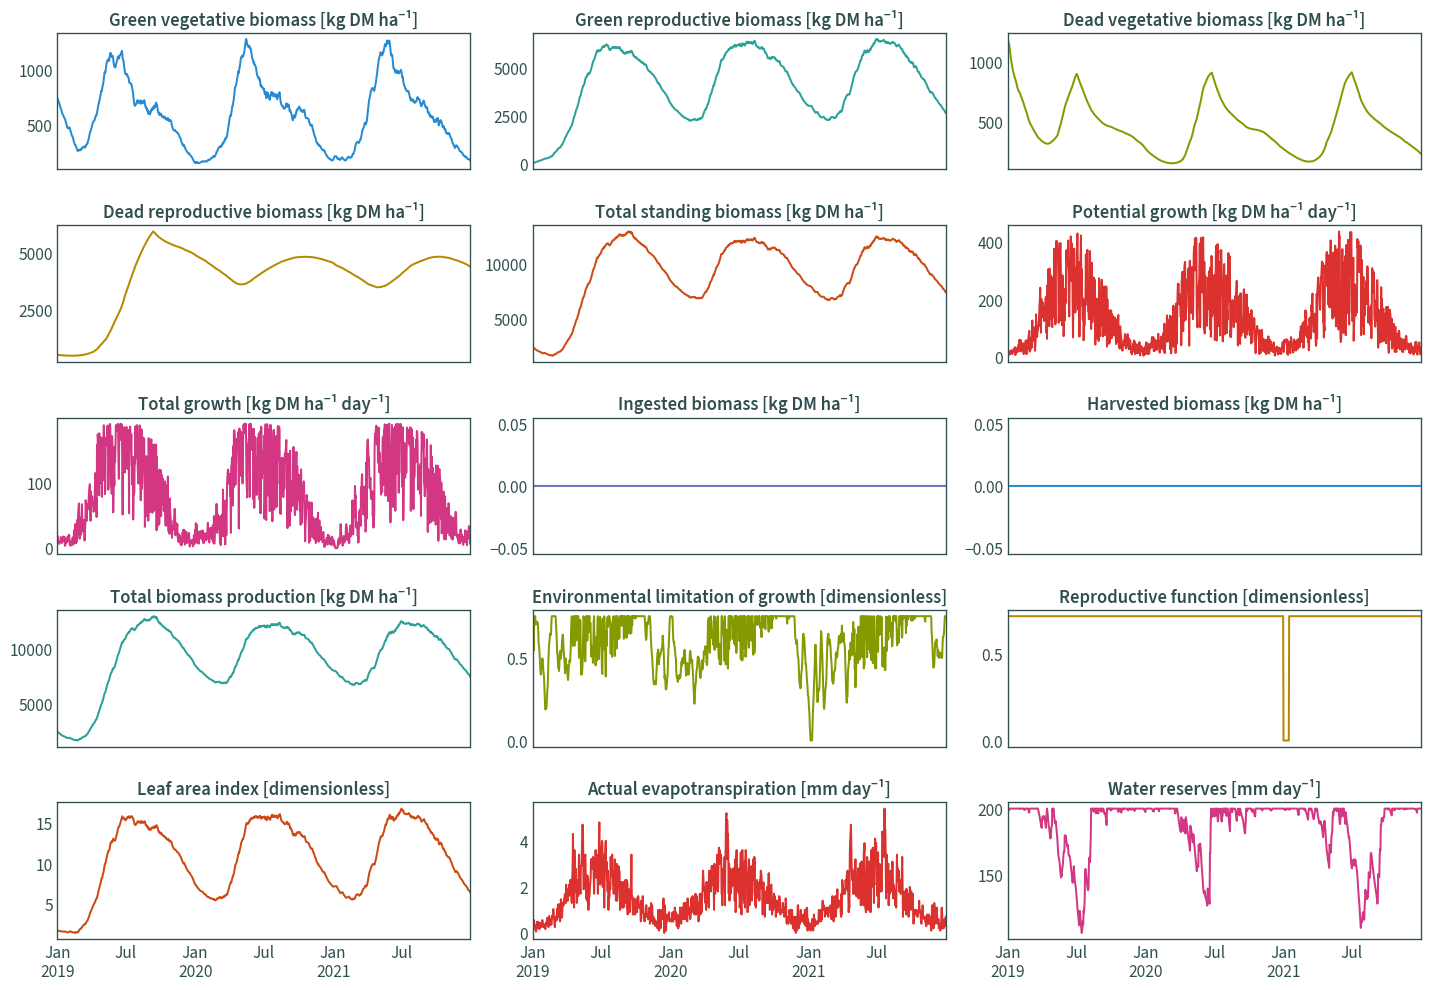

In [12]:
run_modvege(
    input_params_file=PARAMS_FILE,
    input_timeseries_file=TS_FILE,
    out_dir=DATA_DIR,
)

## Using the original definition of LAI

### h = 0.05 m

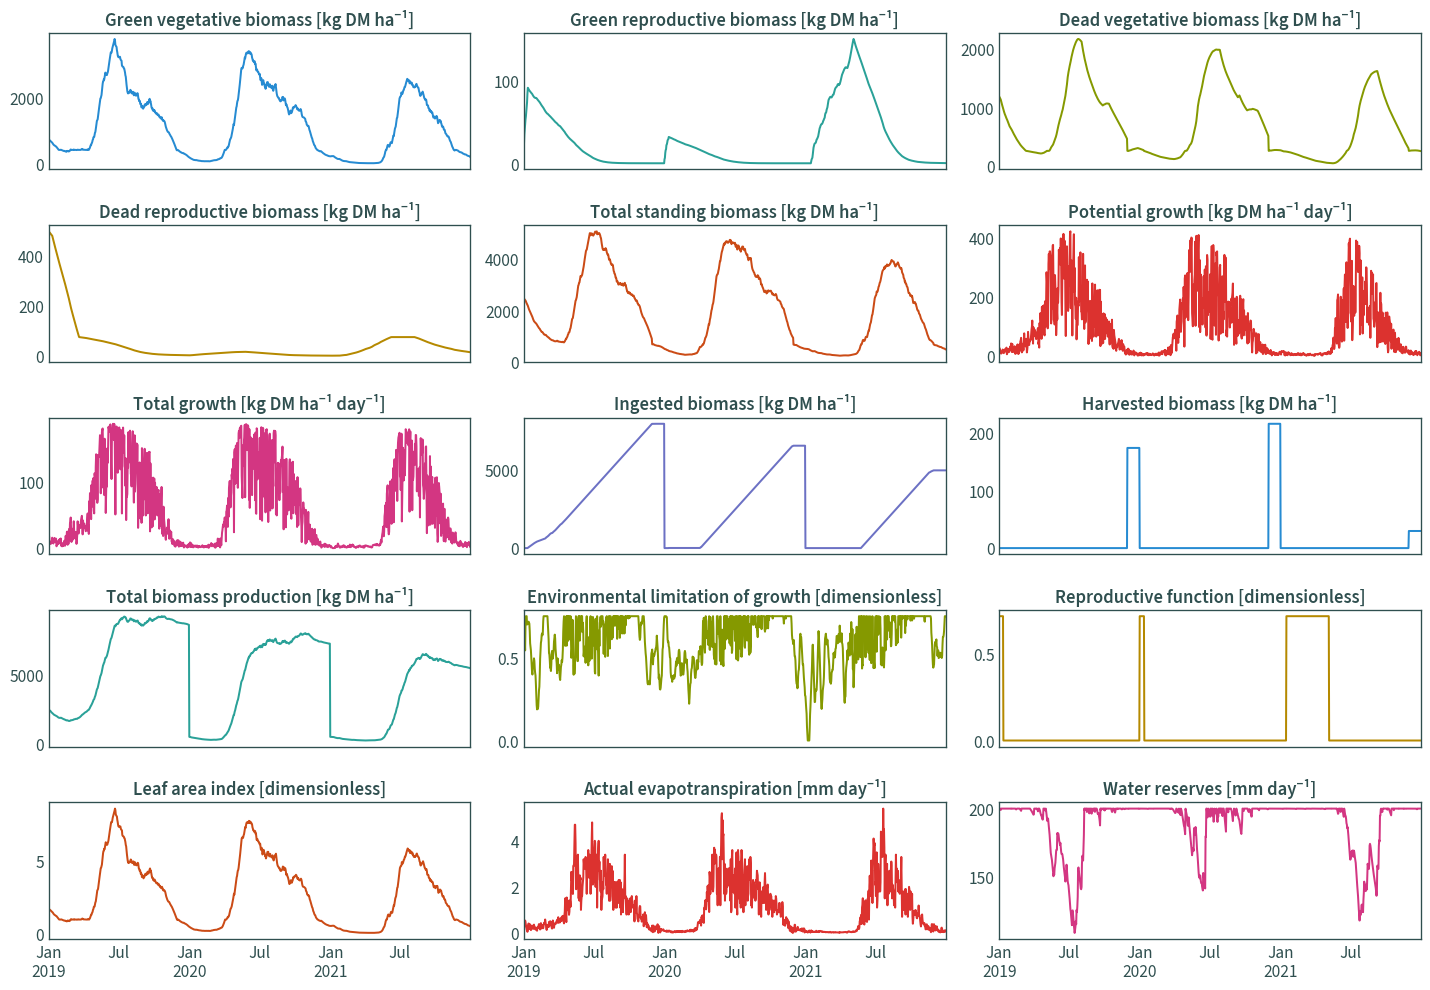

In [5]:
run_modvege(
    input_params_file=PARAMS_FILE,
    input_timeseries_file=TS_FILE,
    out_dir=DATA_DIR,
)

### h = 0.00 m (max cutting)

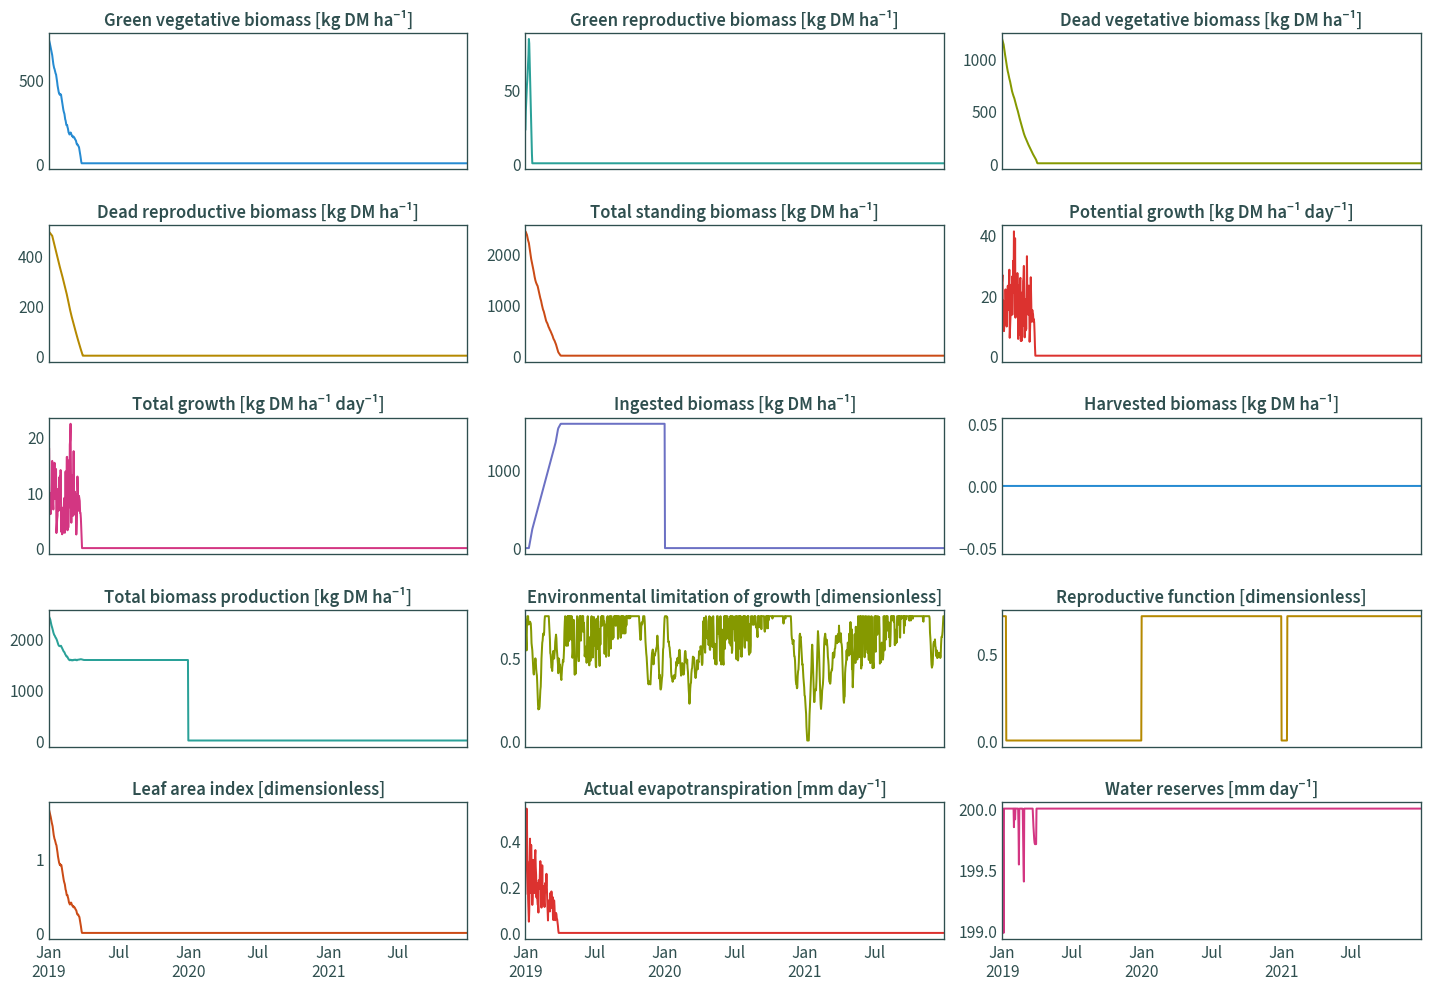

In [6]:
run_modvege(
    input_params_file=PARAMS_FILE,
    input_timeseries_file=TS_FILE,
    out_dir=DATA_DIR,
)

### h = None (no cutting)

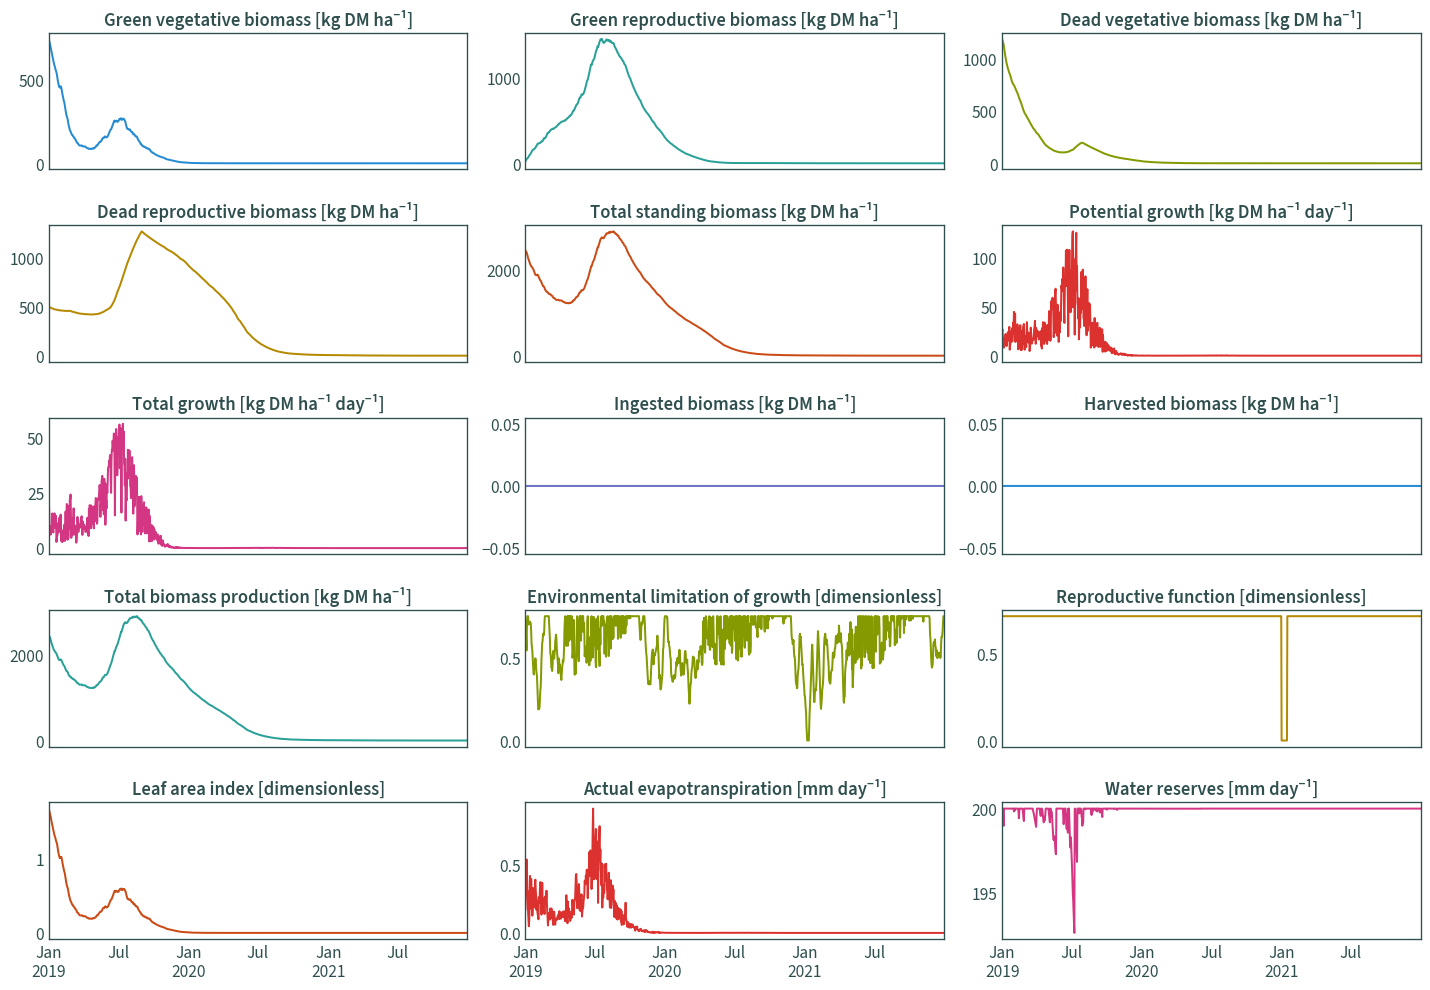

In [7]:
run_modvege(
    input_params_file=PARAMS_FILE,
    input_timeseries_file=TS_FILE,
    out_dir=DATA_DIR,
)